In [91]:
from hdf5generator.generator import HDF5ImageGenerator
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
class Resizer(object):
    def __init__(self,
                 shape=(128, 128),
                 interp=cv2.INTER_AREA):
        
        self.shape = shape
        self.interp = interp

    def preprocess(self, image):
        return cv2.resize(image, self.shape, interpolation=self.interp)

In [97]:
myPreprocessor = Resizer(shape=(227, 227))
    
myAugmenter = ImageDataGenerator(
    rotation_range=8,
    zoom_range = 0.2, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

gen = HDF5ImageGenerator(
    src= '../../storage/datasets/c.h5',
    num_classes=2,
    scaler='std',
    labels_encoding='smooth',
    smooth_factor=0.1,
    batch_size=16,
    augmenter=myAugmenter,
    processors=[myPreprocessor])

In [98]:
x, y = gen[0]
x.shape, y.shape

((16, 227, 227, 3), (16, 2))

In [99]:
x[0]

array([[[ 1.483105  ,  1.6774591 ,  1.6774591 ],
        [ 1.4882131 ,  1.6826662 ,  1.6826662 ],
        [ 1.4933211 ,  1.6878732 ,  1.6878732 ],
        ...,
        [ 0.6451021 ,  0.06579711,  1.0644001 ],
        [ 0.8320315 ,  0.20686235,  1.1449872 ],
        [ 1.2666274 ,  0.6576223 ,  1.4998268 ]],

       [[ 1.4578245 ,  1.6522138 ,  1.6522138 ],
        [ 1.4587849 ,  1.6530237 ,  1.6530237 ],
        [ 1.4597456 ,  1.6538336 ,  1.6538336 ],
        ...,
        [ 0.6679103 ,  0.08261418,  1.0725908 ],
        [ 0.86460537,  0.23535049,  1.1644853 ],
        [ 1.3275012 ,  0.7215624 ,  1.550604  ]],

       [[ 1.4477533 ,  1.6428913 ,  1.6428913 ],
        [ 1.4498726 ,  1.6450106 ,  1.6450106 ],
        [ 1.4519919 ,  1.6471299 ,  1.6471299 ],
        ...,
        [ 0.69276136,  0.1014277 ,  1.0835531 ],
        [ 0.92547905,  0.2992906 ,  1.2152624 ],
        [ 1.3914722 ,  0.8102173 ,  1.598857  ]],

       ...,

       [[-1.2621588 , -1.2308911 , -1.0995437 ],
        [-1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

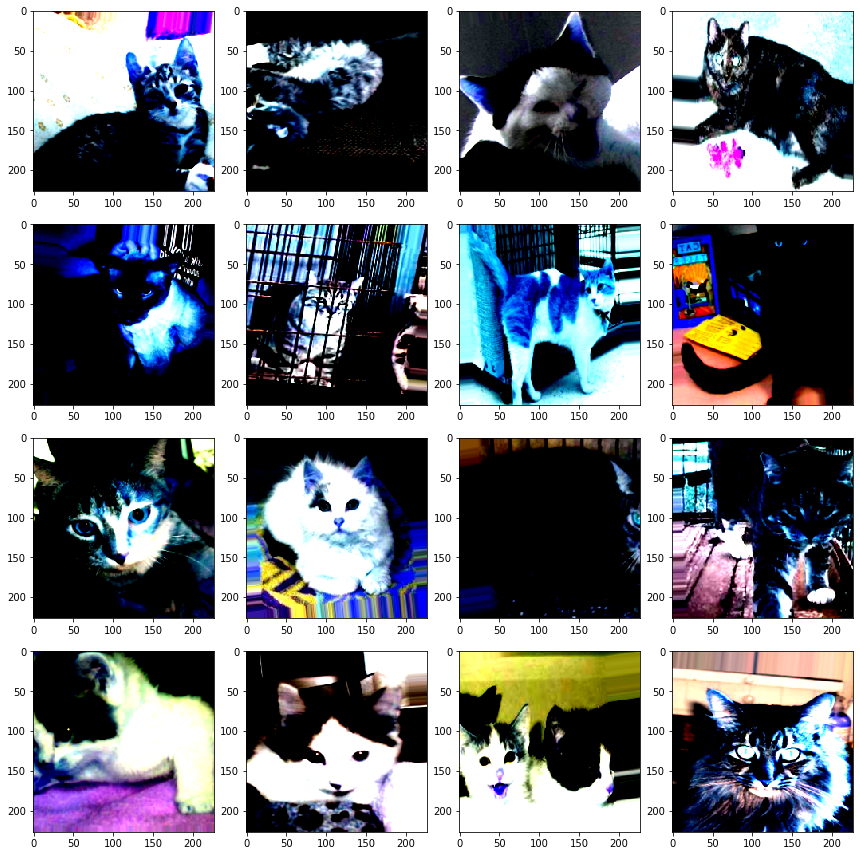

In [100]:
fig, ax = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=[12, 12]
)

for i, fig in enumerate(ax.flat):
    fig.imshow(x[i], cmap='plasma')

plt.tight_layout(True)